Using fuel data from UCI repository. Data has been already preprocessed.
For reference, check my data science repository.

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 6)

In [56]:
data = pd.read_csv("FuelConsumption.csv")

data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [57]:
train_x = np.asanyarray(data[['ENGINESIZE']])
train_y = np.asanyarray(data[['CO2EMISSIONS']])
train_x

array([[2. ],
       [2.4],
       [1.5],
       ...,
       [3. ],
       [3.2],
       [3.2]])

In [0]:
#Initialize slope and intercept randomly

a = tf.Variable(20.0)
b = tf.Variable(30.2)
y = a * train_x + b

loss = tf.reduce_mean(tf.square(y - train_y))
optimizer = tf.train.GradientDescentOptimizer(0.05)
train = optimizer.minimize(loss) #training

In [0]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [60]:
#starting optimization 

loss_values = []
train_data = []
for step in range(100):
    _, loss_val, a_val, b_val = sess.run([train, loss, a, b])
    loss_values.append(loss_val)
    if step % 5 == 0:
        print(step, loss_val, a_val, b_val)
        train_data.append([a_val, b_val])

0 26992.594 77.07107 46.11027
5 1891.7205 58.844624 47.595726
10 1762.7241 57.65104 53.01983
15 1653.5897 56.36652 58.02392
20 1559.0437 55.172848 62.682037
25 1477.1372 54.061794 67.01765
30 1406.179 53.027664 71.05309
35 1344.7057 52.065136 74.809135
40 1291.4506 51.169243 78.30513
45 1245.3143 50.335377 81.55909
50 1205.3451 49.559246 84.58776
55 1170.7186 48.836845 87.406746
60 1140.7212 48.164463 90.03056
65 1114.7338 47.53863 92.47271
70 1092.22 46.956135 94.74577
75 1072.716 46.413963 96.861465
80 1055.8193 45.90933 98.83068
85 1041.181 45.439636 100.66355
90 1028.4996 45.002453 102.36953
95 1017.5135 44.595547 103.95739


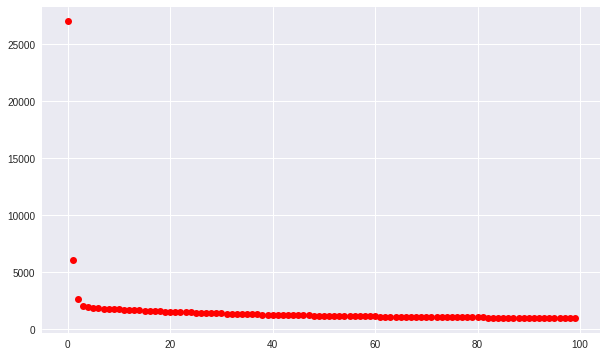

In [63]:
plt.plot(loss_values, 'ro')

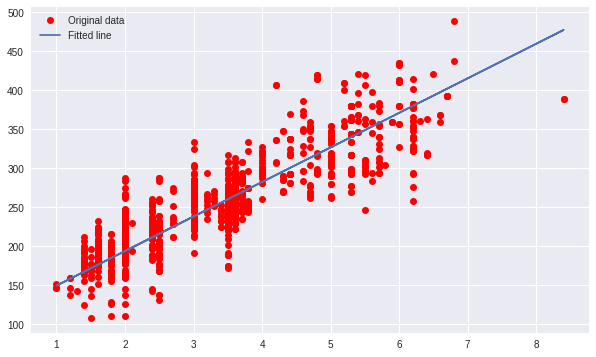

In [69]:
plt.plot(train_x, train_y, 'ro', label='Original data')
plt.plot(train_x,a_val * train_x + b_val , label='Fitted line')
plt.legend()
plt.show()